# COVID-19 EXPLORATORY DATA ANALYSIS 

## Import Libraries and Load Data

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df=pd.read_csv('cleaned_covid_data.csv',low_memory=False)
df

,continent,location,date,new_cases,new_cases_smoothed,new_deaths,new_deaths_smoothed,new_cases_per_million,new_cases_smoothed_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,new_tests_per_thousand,new_tests_smoothed,positive_rate,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,stringency_index,median_age,aged_65_older,aged_70_older,gdp_per_capita,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality
0,Asia,Afghanistan,2020-01-05,0.0,NaN,0.0,NaN,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,18.6,2.581,1.337,1803.987,0.5,64.83,0.511,41128772.0,NaN
1,Asia,Afghanistan,2020-01-06,0.0,NaN,0.0,NaN,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,18.6,2.581,1.337,1803.987,0.5,64.83,0.511,41128772.0,NaN
2,Asia,Afghanistan,2020-01-07,0.0,NaN,0.0,NaN,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,18.6,2.581,1.337,1803.987,0.5,64.83,0.511,41128772.0,NaN
3,Asia,Afghanistan,2020-01-08,0.0,NaN,0.0,NaN,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,18.6,2.581,1.337,1803.987,0.5,64.83,0.511,41128772.0,NaN
4,Asia,Afghanistan,2020-01-09,0.0,NaN,0.0,NaN,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,18.6,2.581,1.337,1803.987,0.5,64.83,0.511,41128772.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365526,Africa,Zimbabwe,2024-02-28,0.0,0.714,0.0,0.286,0.000,0.044,0.000,0.018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,19.6,2.822,1.882,1899.775,1.7,61.49,0.571,16320539.0,NaN
365527,Africa,Zimbabwe,2024-02-29,0.0,0.714,0.0,0.286,0.000,0.044,0.000,0.018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,19.6,2.822,1.882,1899.775,1.7,61.49,0.571,16320539.0,NaN
365528,Africa,Zimbabwe,2024-03-01,0.0,0.714,0.0,0.286,0.000,0.044,0.000,0.018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,19.6,2.822,1.882,1899.775,1.7,61.49,0.571,16320539.0,NaN
365529,Africa,Zimbabwe,2024-03-02,0.0,0.714,0.0,0.286,0.000,0.044,0.000,0.018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,19.6,2.822,1.882,1899.775,1.7,61.49,0.571,16320539.0,NaN


## Preliminary Data Examination

First, we need to get a basic understanding of dataset's structure, columns and types of data.

In [29]:
pd.set_option('display.max_columns',None)
df.head()

,continent,location,date,new_cases,new_cases_smoothed,new_deaths,new_deaths_smoothed,new_cases_per_million,new_cases_smoothed_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,new_tests_per_thousand,new_tests_smoothed,positive_rate,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,stringency_index,median_age,aged_65_older,aged_70_older,gdp_per_capita,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality
0,Asia,Afghanistan,2020-01-05,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,18.6,2.581,1.337,1803.987,0.5,64.83,0.511,41128772.0,NaN
1,Asia,Afghanistan,2020-01-06,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,18.6,2.581,1.337,1803.987,0.5,64.83,0.511,41128772.0,NaN
2,Asia,Afghanistan,2020-01-07,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,18.6,2.581,1.337,1803.987,0.5,64.83,0.511,41128772.0,NaN
3,Asia,Afghanistan,2020-01-08,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,18.6,2.581,1.337,1803.987,0.5,64.83,0.511,41128772.0,NaN
4,Asia,Afghanistan,2020-01-09,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,18.6,2.581,1.337,1803.987,0.5,64.83,0.511,41128772.0,NaN


In [30]:
df.describe()

,new_cases,new_cases_smoothed,new_deaths,new_deaths_smoothed,new_cases_per_million,new_cases_smoothed_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,new_tests_per_thousand,new_tests_smoothed,positive_rate,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,stringency_index,median_age,gdp_per_capita,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality
count,3.546520e+05,3.534820e+05,354947.000000,353777.000000,354652.000000,353482.000000,354947.000000,353777.000000,183741.000000,38596.000000,38596.000000,40123.000000,40123.000000,10670.000000,10670.000000,24127.000000,24127.000000,7.540300e+04,75403.000000,1.039650e+05,95927.000000,6.514300e+04,6.220700e+04,5.505300e+04,1.759720e+05,365531.000000,365531.000000,295925.000000,261706.000000,352006.000000,287533.000000,3.655310e+05,13172.000000
mean,2.184963e+03,2.192045e+03,19.836578,19.899481,134.745507,135.183345,0.828014,0.830709,0.910566,668.739636,15.861343,3952.046108,127.558911,327.237395,9.954626,4342.576615,83.740709,6.728541e+04,3.272466,1.421784e+05,0.098163,3.259906e+07,2.938004e+07,1.972702e+05,7.801057e+04,23.096315,30.150504,18990.616634,3.099879,73.718839,0.722528,3.351663e+07,10.992424
std,9.004107e+04,3.402810e+04,330.186239,123.637969,1582.027204,585.708969,7.445359,2.711720,0.400282,2152.717079,22.869280,9901.711069,151.531081,519.277531,13.676165,10991.075198,88.548938,2.477340e+05,9.033843,1.138215e+06,0.115978,1.233325e+08,1.128672e+08,9.896181e+05,5.491274e+05,28.082944,9.015548,19941.310525,2.555400,7.410744,0.149399,1.351249e+08,24.595139
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,15.100000,661.240000,0.100000,53.280000,0.394000,4.700000e+01,-95.920000
25%,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.720000,22.000000,2.435500,194.000000,32.685000,20.000000,1.715000,234.000000,24.740000,2.244000e+03,0.286000,1.486000e+03,0.017000,7.160085e+05,6.675140e+05,1.392000e+03,2.510000e+02,0.000000,22.000000,3823.194000,1.300000,69.500000,0.602000,3.957620e+05,-1.490000
50%,0.000000e+00,1.314300e+01,0.000000,0.000000,0.000000,3.818000,0.000000,0.000000,0.950000,93.000000,6.604000,793.000000,75.821000,99.000000,4.849000,886.000000,57.335000,8.783000e+03,0.971000,6.570000e+03,0.055000,4.261627e+06,3.947879e+06,1.242000e+04,3.066000e+03,8.330000,29.100000,12294.876000,2.500000,75.050000,0.740000,5.466000e+06,5.660000
75%,0.000000e+00,2.708570e+02,0.000000,2.714000,0.000000,67.420000,0.000000,0.425000,1.140000,421.000000,19.132500,3093.500000,161.365500,376.750000,13.095000,3956.500000,110.925000,3.722900e+04,2.914000,3.220500e+04,0.138100,1.971453e+07,1.777702e+07,7.575900e+04,2.258900e+04,45.370000,38.700000,27216.445000,4.210000,79.460000,0.829000,2.212524e+07,15.710000
max,4.047548e+07,5.782211e+06,47687.000000,6812.429000,240325.866000,34332.267000,906.413000,129.488000,5.870000,28891.000000,180.675000,154497.000000,1526.846000,4838.000000,224.976000,153977.000000,716.982000,3.585563e+07,531.062000,1.476998e+07,1.000000,1.310292e+09,1.276760e+09,2.474100e+07,2.242429e+07,100.000000,48.200000,116935.600000,13.800000,86.750000,0.957000,1.425887e+09,377.700000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365531 entries, 0 to 365530
Data columns (total 38 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   continent                           365531 non-null  object 
 1   location                            365531 non-null  object 
 2   date                                365531 non-null  object 
 3   new_cases                           354652 non-null  float64
 4   new_cases_smoothed                  353482 non-null  float64
 5   new_deaths                          354947 non-null  float64
 6   new_deaths_smoothed                 353777 non-null  float64
 7   new_cases_per_million               354652 non-null  float64
 8   new_cases_smoothed_per_million      353482 non-null  float64
 9   new_deaths_per_million              354947 non-null  float64
 10  new_deaths_smoothed_per_million     353777 non-null  float64
 11  reproduction_rate         

Since, we have already cleaned the data according to our requirements before loading the data into this file, we do not need to do further cleaning. 

## Feature Engineering
Now we will be creating some new date variables which will be further useful for our analysis.

In [32]:
df['date'] = pd.to_datetime(df['date'])

In [33]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['week'] = df['date'].dt.week
df['weekday'] = df['date'].dt.weekday
df['quarter'] = df['date'].dt.quarter
df['day_of_week'] = df['date'].dt.day_name()

C:\Users\Aakriti\AppData\Local\Temp\ipykernel_2252\3498541593.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['date'].dt.week


## Exploratory Analysis and Visualization
Now we will discover patterns in the data by plotting various graphs and get insights about the trends.

### Confirmed Case Trends Over Years By Continents

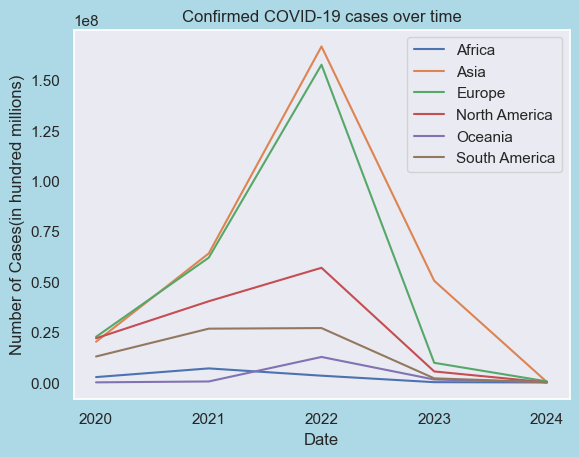

In [35]:
x= df.pivot_table(index='year', columns='continent', values='new_cases', aggfunc='sum')
plt.figure(facecolor='lightblue')
plt.plot(x,label=x.columns)
plt.title('Confirmed COVID-19 cases over time')
plt.xlabel('Date')
plt.xticks([2020,2021,2022,2023,2024])
plt.ylabel('Number of Cases(in hundred millions)')
plt.legend()
plt.grid()
plt.show()

### Confirmed Deaths over Time Worldwide

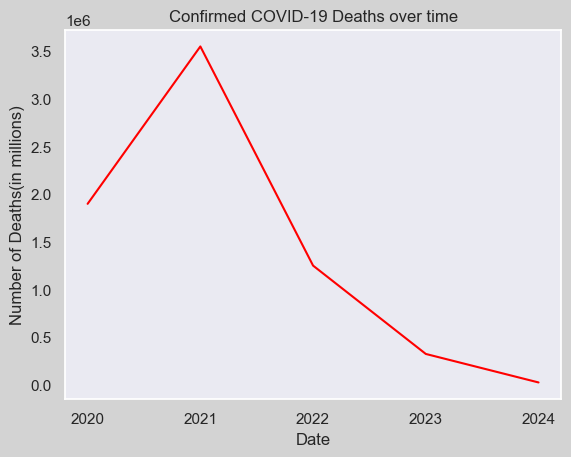

In [42]:
x=df.groupby('year').sum()['new_deaths']
plt.figure(facecolor='lightgrey')
plt.plot(x,color='red')
plt.title('Confirmed COVID-19 Deaths over time')
plt.xlabel('Date')
plt.xticks([2020,2021,2022,2023,2024])
plt.ylabel('Number of Deaths(in millions)')
plt.grid()
plt.show()

### Top 10 Affected Countries

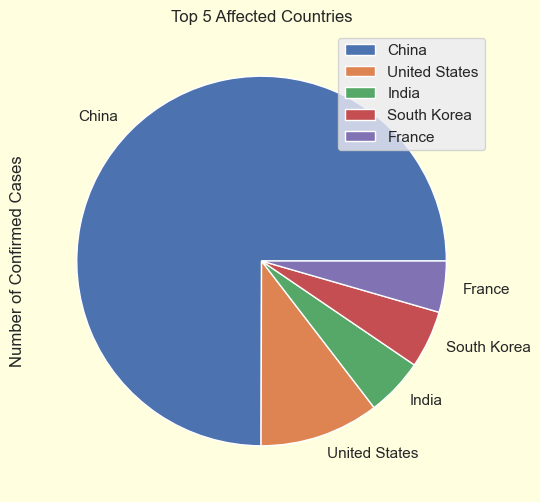

In [38]:
top_countries = df.groupby('location').max()['new_cases'].sort_values(ascending=False).head(5)
plt.figure(figsize=(10,6),facecolor='lightyellow')
top_countries.plot(kind='pie', title='Top 5 Affected Countries')
plt.ylabel('Number of Confirmed Cases')
plt.legend()
plt.show()

### Median Age of Affected People By Continent

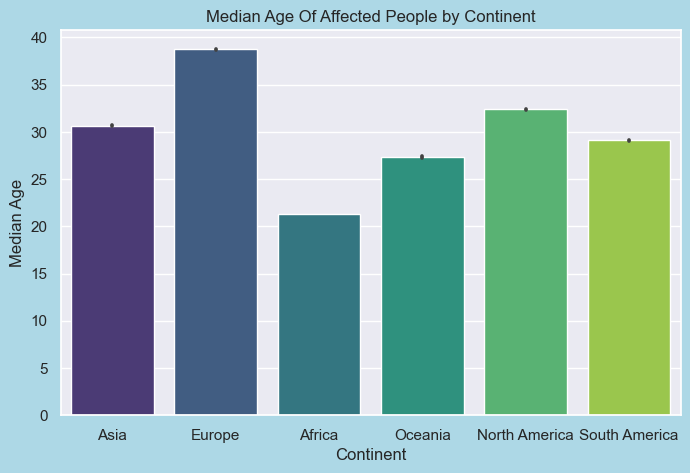

In [44]:
plt.figure(figsize=(8,5),facecolor='lightblue')
sns.barplot(x='continent', y='median_age', data=df,palette='viridis')
plt.title('Median Age Of Affected People by Continent')
plt.xlabel('Continent')
plt.ylabel('Median Age')
plt.show()

### Heatmap of Covid 19 Metrics

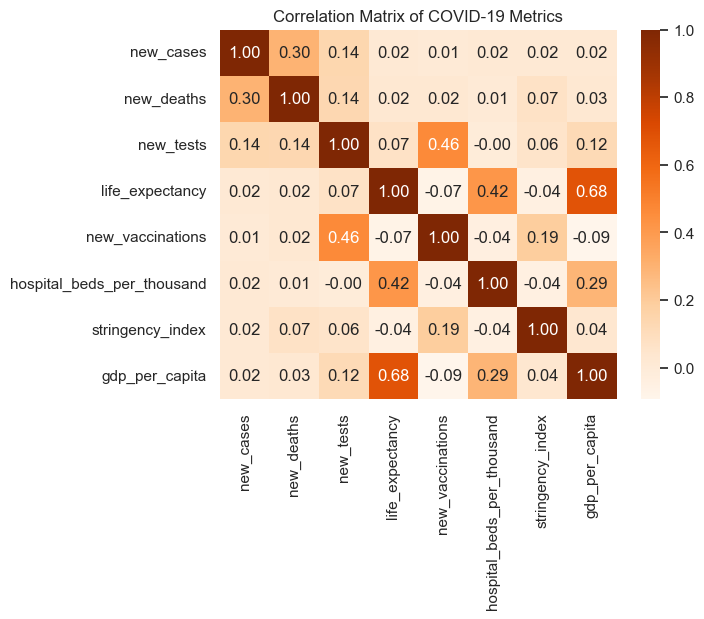

In [22]:
df['mortality_rate']=(df['new_deaths']/df['new_cases'])*100
correlation_matrix = df[['new_cases', 'new_deaths','new_tests','life_expectancy','new_vaccinations','hospital_beds_per_thousand','stringency_index','gdp_per_capita']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Oranges', fmt='.2f')
plt.title('Correlation Matrix of COVID-19 Metrics')
plt.show()

###    Weekly Hospital And ICU admissions during COVID-19 pandemic

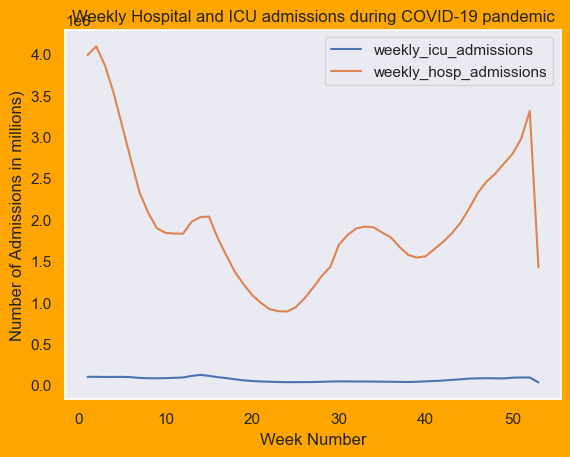

In [23]:
x=df.groupby('week').sum()[['weekly_icu_admissions','weekly_hosp_admissions']]
plt.figure(facecolor='orange')
plt.plot(x,label=['weekly_icu_admissions','weekly_hosp_admissions'])
plt.title('Weekly Hospital and ICU admissions during COVID-19 pandemic')
plt.xlabel('Week Number')
plt.ylabel('Number of Admissions in millions)')
plt.legend()
plt.grid()
plt.show()

## Insights From Data

Now we are going to summarize the key findings and trends from our COVID-19 exploratory data analysis.

- There was a sharp increase in the cases worldwide in the year 2022 and Asia was the most affected continent during the COVID-19 Pandemic. 
- The highest number of fatalities due to COVID-19 were recorded in the year 2021 which caused a major impact on the world population. 
- The five countries most significantly impacted by COVID-19 were China, USA, India, South Korea and France.
- The median age of affected people in all continents is around 30 years which means that half of the affected population is younger than 30 and the other half is older than 30.
- There is good correlation between life expectancy and GDP per capita as higher GDP per capita is associated with longer life expectancy. There is also a positive correlation between GDP per capita and hospital beds per thousand because if a country has a higher GDP, it was able to provide more hospital beds and vice versa.
- There was a sharp rise in the weekly hospital admissions around 3rd and 4th week. The weekly ICU admissions were almost constant during all the weeks and did not see any major rise.
- As of 2024, since COVID-19 pandemic has ended, the number of cases and deaths have also sharply declined.